<a href="https://colab.research.google.com/github/sikandarmir/DeepLearning/blob/main/Image_classification_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train,),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,) #Now its 1D Array -1 mean no change
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
x_test.shape
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])


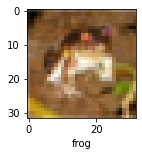

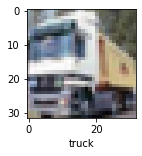

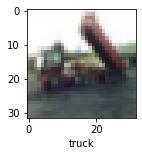

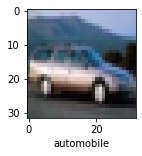

In [8]:
plot_sample(x_train,y_train,0)
plot_sample(x_train,y_train,1)
plot_sample(x_train,y_train,2)
plot_sample(x_train,y_train,4)

In [9]:
#Normalizing from 0-1 instead of 1 -255
x_train=x_train/255
x_test=x_test/255


Build simple artificial neural network for image classification

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 6ms/step - loss: 1.8118 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6219 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5407 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4802 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4312 - accuracy: 0.4969


In [11]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4933 - accuracy: 0.4658


[1.4932582378387451, 0.4657999873161316]

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.45      0.53      1000
           1       0.61      0.57      0.59      1000
           2       0.32      0.50      0.39      1000
           3       0.35      0.35      0.35      1000
           4       0.43      0.30      0.35      1000
           5       0.50      0.26      0.35      1000
           6       0.44      0.68      0.53      1000
           7       0.75      0.32      0.45      1000
           8       0.74      0.48      0.58      1000
           9       0.38      0.74      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



Now CNN Network

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 6ms/step - loss: 1.4523 - accuracy: 0.4823
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0859 - accuracy: 0.6211
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9535 - accuracy: 0.6669
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8725 - accuracy: 0.6969
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7994 - accuracy: 0.7233
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7442 - accuracy: 0.7380
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6930 - accuracy: 0.7582
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6483 - accuracy: 0.7741
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6037 - accuracy: 0.7894
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.56

In [31]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9565 - accuracy: 0.6977


[0.9564912915229797, 0.697700023651123]

In [32]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.8544777e-03, 9.6006296e-04, 7.3803923e-05, 9.6652913e-01,
        1.2068083e-04, 2.1443846e-02, 7.8946613e-03, 9.9020290e-05,
        2.3885031e-04, 7.8528927e-04],
       [2.7135311e-05, 2.7348645e-02, 1.3374317e-07, 2.1126700e-08,
        8.4783472e-11, 2.0598741e-10, 6.0844600e-11, 8.8616926e-14,
        9.7261977e-01, 4.3478390e-06],
       [4.5559811e-03, 2.0355435e-01, 3.9373193e-04, 2.1572437e-03,
        1.2786085e-05, 4.5095891e-04, 2.8040477e-05, 1.6497601e-04,
        7.8361779e-01, 5.0642197e-03],
       [8.5138732e-01, 1.0915955e-02, 3.9753724e-02, 2.4560487e-03,
        5.1657376e-03, 3.8258757e-05, 7.8584679e-04, 4.4162061e-05,
        8.9019001e-02, 4.3398785e-04],
       [4.4326765e-07, 1.5950198e-05, 2.8762290e-02, 3.2094959e-02,
        3.8095945e-01, 1.9502469e-03, 5.5610853e-01, 1.0614137e-06,
        1.0691410e-04, 1.3789573e-07]], dtype=float32)

In [33]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

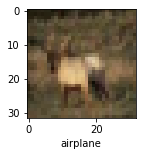

In [42]:
y_test=y_test.reshape(-1,)
plot_sample(x_test, y_test,3)

In [41]:
classes[y_classes[3]]

'airplane'

In [36]:
classes[y_classes[3]]

'airplane'

In [43]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[1.8544777e-03, 9.6006296e-04, 7.3803923e-05, 9.6652913e-01,
        1.2068083e-04, 2.1443846e-02, 7.8946613e-03, 9.9020290e-05,
        2.3885031e-04, 7.8528927e-04],
       [2.7135311e-05, 2.7348645e-02, 1.3374317e-07, 2.1126700e-08,
        8.4783472e-11, 2.0598741e-10, 6.0844600e-11, 8.8616926e-14,
        9.7261977e-01, 4.3478390e-06],
       [4.5559811e-03, 2.0355435e-01, 3.9373193e-04, 2.1572437e-03,
        1.2786085e-05, 4.5095891e-04, 2.8040477e-05, 1.6497601e-04,
        7.8361779e-01, 5.0642197e-03],
       [8.5138732e-01, 1.0915955e-02, 3.9753724e-02, 2.4560487e-03,
        5.1657376e-03, 3.8258757e-05, 7.8584679e-04, 4.4162061e-05,
        8.9019001e-02, 4.3398785e-04],
       [4.4326765e-07, 1.5950198e-05, 2.8762290e-02, 3.2094959e-02,
        3.8095945e-01, 1.9502469e-03, 5.5610853e-01, 1.0614137e-06,
        1.0691410e-04, 1.3789573e-07]], dtype=float32)

In [50]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [49]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

In [51]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.79      0.83      0.81      1000
           2       0.65      0.54      0.59      1000
           3       0.55      0.47      0.51      1000
           4       0.66      0.65      0.65      1000
           5       0.55      0.68      0.61      1000
           6       0.80      0.75      0.78      1000
           7       0.72      0.76      0.74      1000
           8       0.80      0.79      0.79      1000
           9       0.72      0.80      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

